# GoogleDriveをマウント

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("./drive/My Drive/Causal_Analysys/Boston")

# 設定

In [4]:
# 乱数のシードを設定
import random
import numpy as np

np.random.seed(1234)
random.seed(1234)

In [5]:
#組み合わせを取得する関数
import itertools

# その他
import pandas as pd
from IPython.display import Image
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [6]:
# PCアルゴリズム
!pip install pgmpy==0.1.11

     |████████████████████████████████| 317kB 12.1MB/s 


In [7]:
# 独立性の検定に使用
from pgmpy.estimators import ConstraintBasedEstimator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# データ作成

In [8]:
boston = load_boston()
 
df = pd.DataFrame(boston.data, columns=boston.feature_names) # 説明変数
df['MEDV'] = boston.target # 目的変数を追加
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
# 欠損値の確認
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
# 基本統計量
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# 標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
 
df =pd.DataFrame(df_scaled,columns=df.columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [12]:
# 相関行列
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


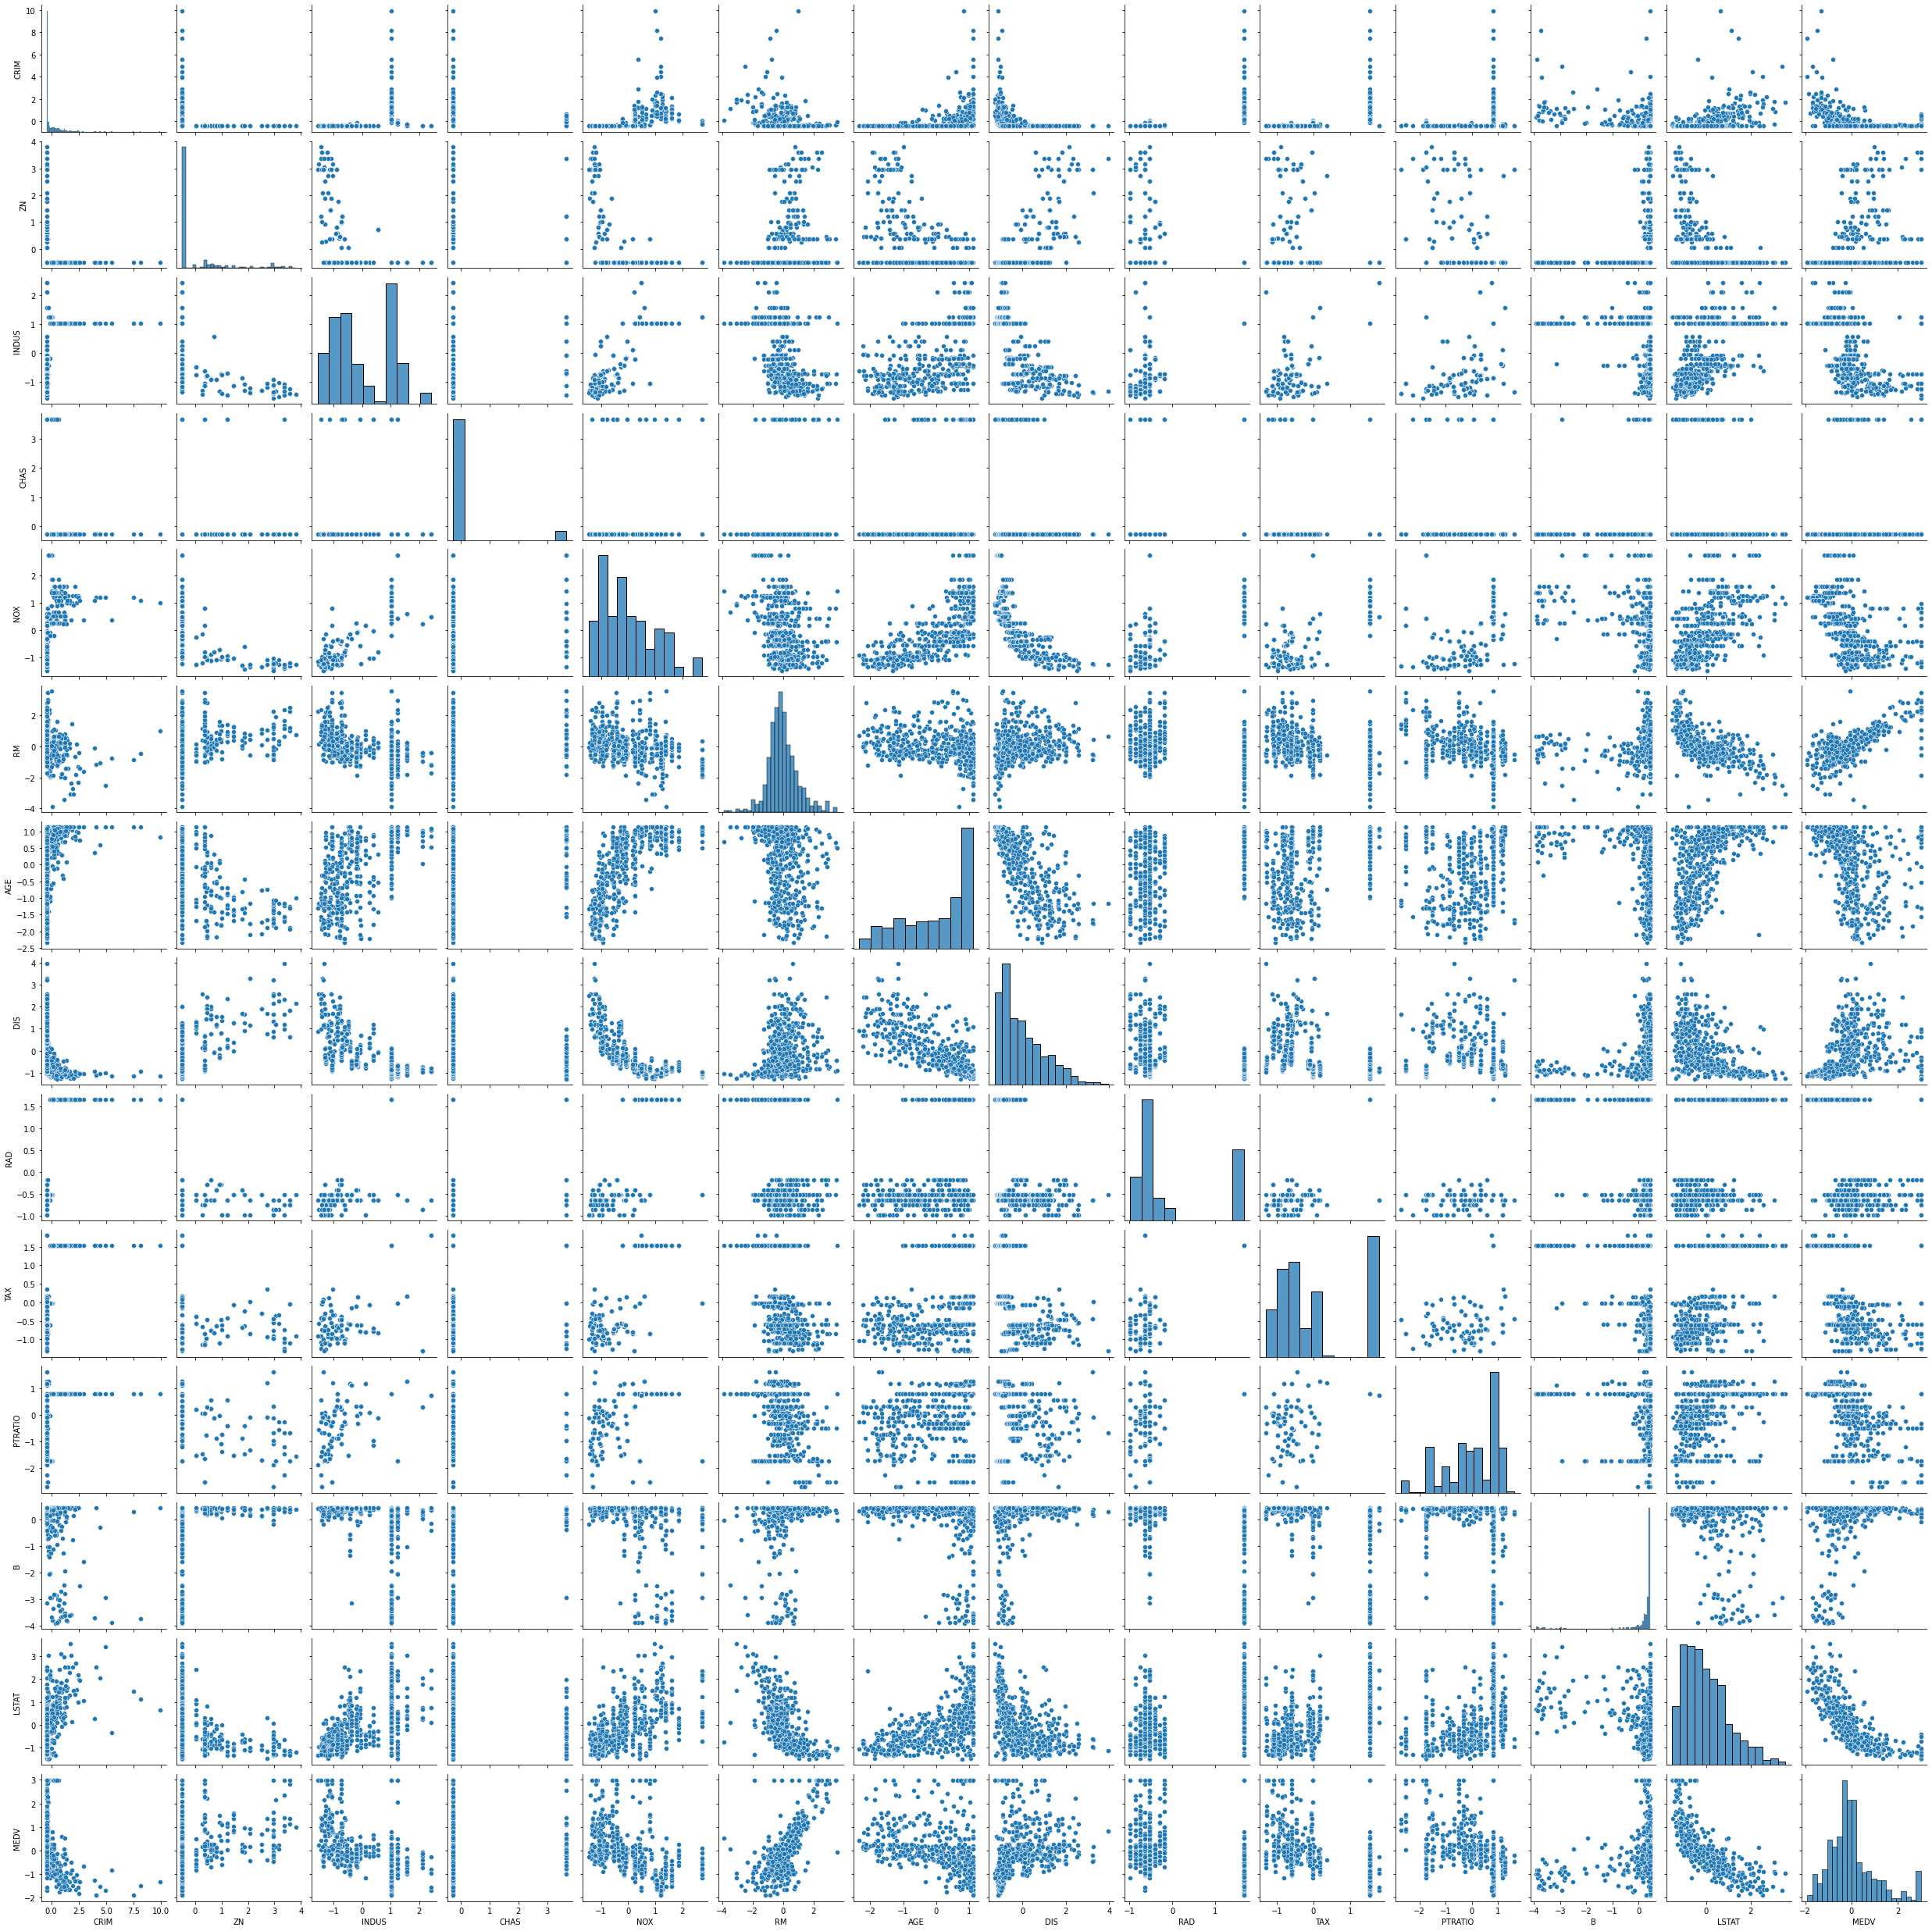

In [13]:
#相関係数をプロット
sns.pairplot(df)

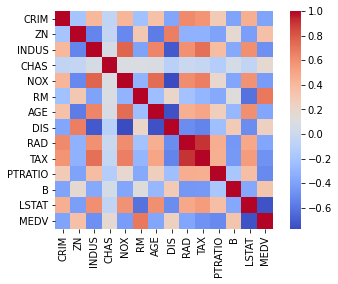

In [14]:
# ヒートマップ
sns.heatmap(corr_matrix,
            square=True,
            cmap='coolwarm',
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

In [15]:
# yとの相関係数を表示
corr_y = pd.DataFrame({"features":df.columns,"corr_y":corr_matrix["MEDV"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

corr_y = pd.DataFrame({"features":df.columns,"corr_y":corr_matrix["MEDV"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,features,corr_y
0,CRIM,-0.388305
1,ZN,0.360445
2,INDUS,-0.483725
3,CHAS,0.175260
4,NOX,-0.427321
5,RM,0.695360
6,AGE,-0.376955
7,DIS,0.249929
8,RAD,-0.381626
9,TAX,-0.468536


In [16]:
# データタイプを確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [17]:
# 連続値 →　離散値に変更
df_new = df.copy()

df_new['CRIM'] = pd.cut(df_new['CRIM'], 4)
df_new['ZN'] = pd.cut(df_new['ZN'], 4)
df_new['INDUS'] = pd.cut(df_new['INDUS'], 3)
df_new['CHAS'] = pd.cut(df_new['CHAS'], 3)
df_new['NOX'] = pd.cut(df_new['NOX'], 3)
df_new['RM'] = pd.cut(df_new['RM'], 3)
df_new['AGE'] = pd.cut(df_new['AGE'], 4)
df_new['DIS'] = pd.cut(df_new['DIS'], 3)
df_new['RAD'] = pd.cut(df_new['RAD'], 4)
df_new['TAX'] = pd.cut(df_new['TAX'], 4)
df_new['PTRATIO'] = pd.cut(df_new['PTRATIO'], 3)
df_new['B'] = pd.cut(df_new['B'], 4)
df_new['LSTAT'] = pd.cut(df_new['LSTAT'], 3)
df_new['MEDV'] = pd.cut(df_new['MEDV'], 4)

In [18]:
df_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,"(-0.43, 2.169]","(-0.492, 0.585]","(-1.562, -0.231]","(-0.277, 1.041]","(-1.47, -0.0665]","(-1.402, 1.077]","(-0.609, 0.254]","(-1.272, 0.475]","(-0.985, -0.322]","(-1.317, -0.536]","(-2.712, -1.259]","(-0.646, 0.441]","(-1.536, 0.162]","(-0.684, 0.541]"
1,"(-0.43, 2.169]","(-0.492, 0.585]","(-1.562, -0.231]","(-0.277, 1.041]","(-1.47, -0.0665]","(-1.402, 1.077]","(0.254, 1.117]","(0.475, 2.218]","(-0.985, -0.322]","(-1.317, -0.536]","(-1.259, 0.19]","(-0.646, 0.441]","(-1.536, 0.162]","(-0.684, 0.541]"
2,"(-0.43, 2.169]","(-0.492, 0.585]","(-1.562, -0.231]","(-0.277, 1.041]","(-1.47, -0.0665]","(1.077, 3.555]","(-0.609, 0.254]","(0.475, 2.218]","(-0.985, -0.322]","(-1.317, -0.536]","(-1.259, 0.19]","(-0.646, 0.441]","(-1.536, 0.162]","(0.541, 1.765]"
3,"(-0.43, 2.169]","(-0.492, 0.585]","(-1.562, -0.231]","(-0.277, 1.041]","(-1.47, -0.0665]","(-1.402, 1.077]","(-1.472, -0.609]","(0.475, 2.218]","(-0.985, -0.322]","(-1.317, -0.536]","(-1.259, 0.19]","(-0.646, 0.441]","(-1.536, 0.162]","(0.541, 1.765]"
4,"(-0.43, 2.169]","(-0.492, 0.585]","(-1.562, -0.231]","(-0.277, 1.041]","(-1.47, -0.0665]","(1.077, 3.555]","(-0.609, 0.254]","(0.475, 2.218]","(-0.985, -0.322]","(-1.317, -0.536]","(-1.259, 0.19]","(-0.646, 0.441]","(-1.536, 0.162]","(0.541, 1.765]"


# PCアルゴリズム

In [19]:
est = ConstraintBasedEstimator(df_new)

skel, seperating_sets = est.estimate_skeleton(significance_level=0.01)
print("Undirected edges: ", skel.edges())

pdag = est.skeleton_to_pdag(skel, seperating_sets)
print("PDAG edges:       ", pdag.edges())

model = est.pdag_to_dag(pdag)
print("DAG edges:        ", model.edges())

Undirected edges:  [('INDUS', 'NOX'), ('INDUS', 'RAD'), ('INDUS', 'PTRATIO'), ('NOX', 'TAX'), ('NOX', 'PTRATIO'), ('RM', 'LSTAT'), ('RM', 'MEDV'), ('AGE', 'DIS'), ('AGE', 'LSTAT'), ('RAD', 'TAX'), ('PTRATIO', 'MEDV'), ('LSTAT', 'MEDV')]
PDAG edges:        [('NOX', 'INDUS'), ('NOX', 'TAX'), ('NOX', 'PTRATIO'), ('RM', 'LSTAT'), ('RM', 'MEDV'), ('AGE', 'DIS'), ('AGE', 'LSTAT'), ('DIS', 'AGE'), ('RAD', 'INDUS'), ('RAD', 'TAX'), ('TAX', 'NOX'), ('TAX', 'RAD'), ('PTRATIO', 'INDUS'), ('LSTAT', 'MEDV'), ('MEDV', 'RM')]
DAG edges:         [('NOX', 'INDUS'), ('NOX', 'PTRATIO'), ('NOX', 'TAX'), ('RM', 'LSTAT'), ('RM', 'MEDV'), ('AGE', 'LSTAT'), ('AGE', 'DIS'), ('RAD', 'INDUS'), ('TAX', 'RAD'), ('PTRATIO', 'INDUS'), ('LSTAT', 'MEDV')]


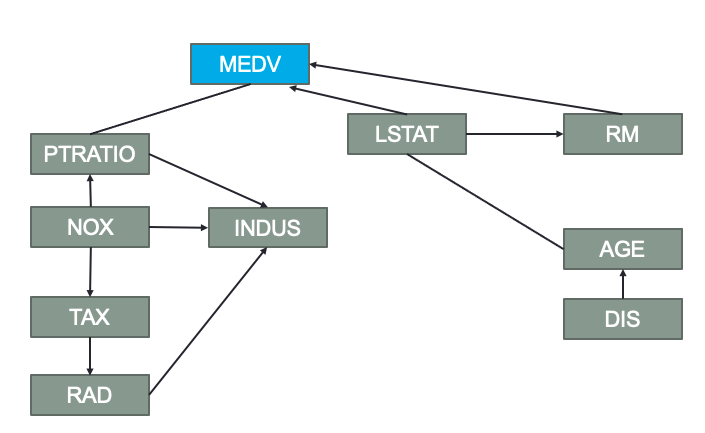

In [20]:
# 可視化

# MEDVとPTRATIOの因果方向は決まらなかった
Image("Diagram_Boston.png")

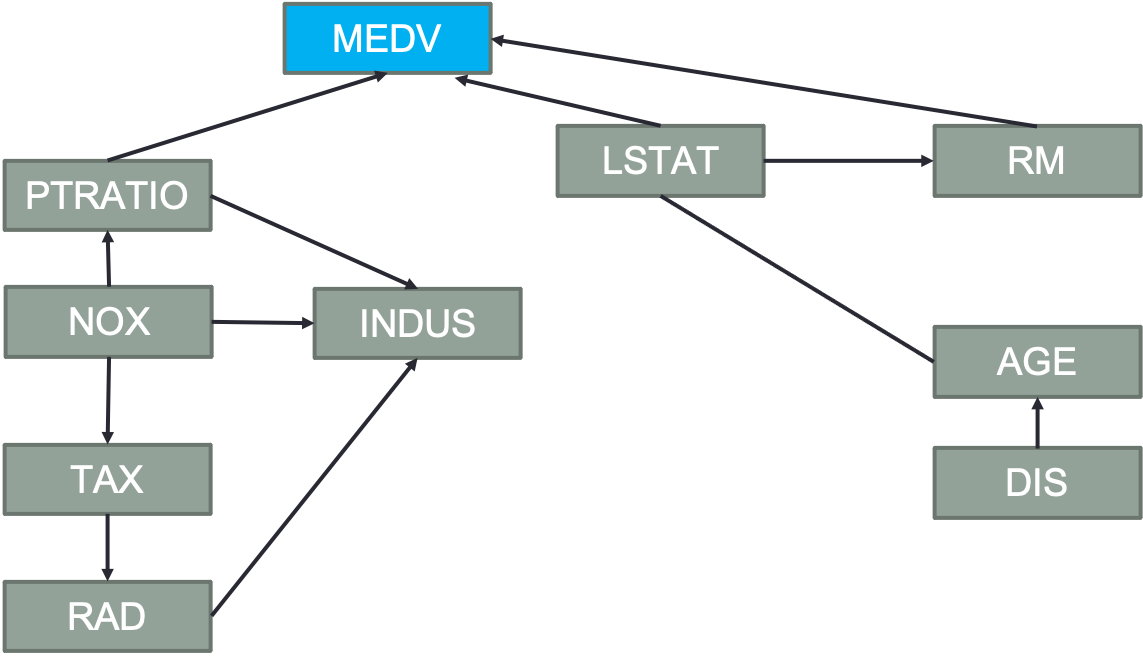

In [21]:
# 可視化

# MEDVとPTRATIOは、無難な方向性を当てはめる
Image("Diagram_2.png")